In [1]:
import re
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\soumy\AppData\Local\Temp\ipykernel_22032\950016331.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data=pd.read_csv(r"C:\Users\soumy\OneDrive\Desktop\kindle_reviews.csv\kindle_reviews.csv")

In [3]:
data.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [4]:
print("number of rows and columns:",data.shape)

number of rows and columns: (982619, 10)


In [5]:
data.columns

Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [6]:
data.reviewText[0]

"I enjoy vintage books and movies so I enjoyed reading this book.  The plot was unusual.  Don't think killing someone in self-defense but leaving the scene and the body without notifying the police or hitting someone in the jaw to knock them out would wash today.Still it was a good read for me."

In [7]:
a=data.overall.value_counts()
a

overall
5    575264
4    254013
3     96194
2     34130
1     23018
Name: count, dtype: int64

In [8]:
data.isnull().sum()

Unnamed: 0           0
asin                 0
helpful              0
overall              0
reviewText          22
reviewTime           0
reviewerID           0
reviewerName      3822
summary            119
unixReviewTime       0
dtype: int64

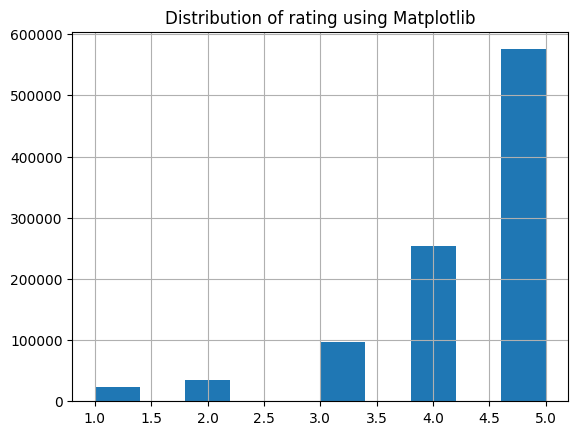

In [9]:
data.overall.hist()
plt.title("Distribution of rating using Matplotlib")
plt.show()

In [10]:
fig = go.Figure([go.Bar(x=a.index, y=a.values,text=a.values)])
fig.update_layout(title='Distribution of the Rating using ploty')
fig.show()

In [11]:
data["overall"] = data["overall"].apply(lambda x: 0 if x < 5  else 1)  # positive as 1 and negative as 0

In [12]:
data['overall'].value_counts()

overall
1    575264
0    407355
Name: count, dtype: int64

In [13]:
 data = data[['reviewText', 'overall']]
data.head()


,reviewText,overall
0,I enjoy vintage books and movies so I enjoyed ...,1
1,This book is a reissue of an old one; the auth...,0
2,This was a fairly interesting read. It had ol...,0
3,I'd never read any of the Amy Brewster mysteri...,1
4,"If you like period pieces - clothing, lingo, y...",0


In [14]:
data.isnull().sum()

reviewText    22
overall        0
dtype: int64

In [15]:
df = data.dropna()

In [16]:
df.isnull().sum()

reviewText    0
overall       0
dtype: int64

In [17]:
data

,reviewText,overall
0,I enjoy vintage books and movies so I enjoyed ...,1
1,This book is a reissue of an old one; the auth...,0
2,This was a fairly interesting read. It had ol...,0
3,I'd never read any of the Amy Brewster mysteri...,1
4,"If you like period pieces - clothing, lingo, y...",0
...,...,...
982614,Yasss hunny! This is a great read. That Dre is...,1
982615,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,1
982616,Great book! Cherika was a fool. She let that m...,1
982617,When I say this was an excellent book please b...,1


In [18]:
import string

In [19]:
from spacy.lang.en.stop_words import STOP_WORDS
data['reviewText'] = data['reviewText'].apply(lambda x: " ".join([i for i in str(x).split() if i not in STOP_WORDS]) )

data.head()

,reviewText,overall
0,I enjoy vintage books movies I enjoyed reading...,1
1,This book reissue old one; author born 1910. I...,0
2,This fairly interesting read. It old- style te...,0
3,I'd read Amy Brewster mysteries one.. So I hoo...,1
4,"If like period pieces - clothing, lingo, enjoy...",0


In [20]:
# 2. remove punctuation! 
data['reviewText'] = data['reviewText'].apply(lambda x: re.sub('[^a-z A-Z 0-9-]+', '', str(x)))  # it removes the punctuation 
data.head()

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
data['reviewText'] = data['reviewText'].apply(lambda x: " ".join([i for i in str(x).split() if i not in STOP_WORDS]) )

data.head()

,reviewText,overall
0,I enjoy vintage books movies I enjoyed reading...,1
1,This book reissue old author born 1910 Its era...,0
2,This fairly interesting read It old- style ter...,0
3,Id read Amy Brewster mysteries So I hooked,1
4,If like period pieces - clothing lingo enjoy m...,0


In [ ]:
# 4. remove url and tags! 
data['reviewText'] = data['reviewText'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))
                                              
data.head()

,reviewText,overall
0,I enjoy vintage books movies I enjoyed reading...,1
1,This book reissue old author born 1910 Its era...,0
2,This fairly interesting read It old- style ter...,0
3,Id read Amy Brewster mysteries So I hooked,1
4,If like period pieces - clothing lingo enjoy m...,0


In [ ]:
# 8. remove extra spaces
data['reviewText'] = data['reviewText'].apply(lambda x: " ".join(str(x).split()))
data.head()

,reviewText,overall
0,I enjoy vintage books movies I enjoyed reading...,1
1,This book reissue old author born 1910 Its era...,0
2,This fairly interesting read It old- style ter...,0
3,Id read Amy Brewster mysteries So I hooked,1
4,If like period pieces - clothing lingo enjoy m...,0


In [ ]:
# 7. remove emails 
data['reviewText'] = data['reviewText'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '',str(x)))  # it will remove te emails 

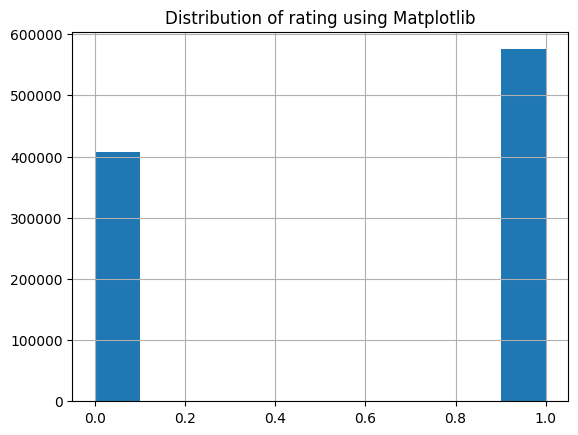

In [ ]:
data.overall.hist()
plt.title("Distribution of rating using Matplotlib")
plt.show()


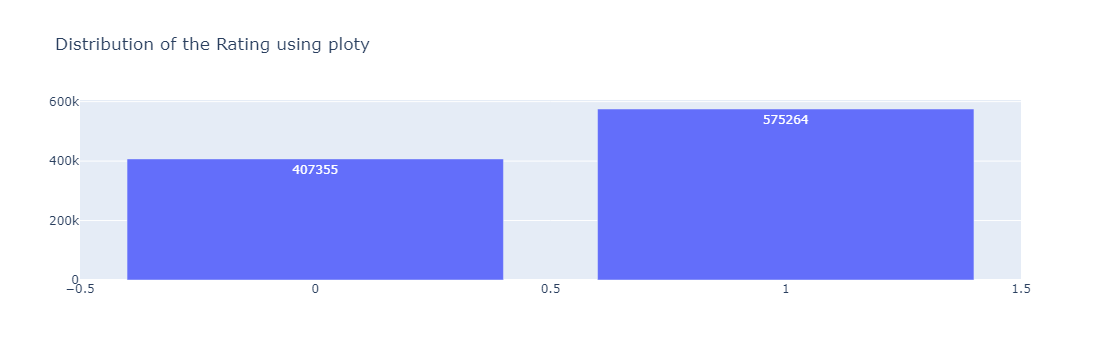

In [ ]:
a  = data.overall.value_counts()
fig = go.Figure([go.Bar(x=a.index, y=a.values,text=a.values)])
fig.update_layout(title='Distribution of the Rating using ploty')
fig.show()

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image  

# get the text based on ratings! 
rating_zero = data['reviewText'][data['overall'] == 0]
rating_one = data['reviewText'][data['overall'] == 1]


# word tokenize the data 
def list_tokenizer(overall): 
    ratings = " ".join(overall)
    ratings = nltk.word_tokenize(ratings)
    return str(ratings)

# visualizer 
def word_cloud(overall, number): 
    wc = WordCloud(background_color = 'black', max_font_size = 50, max_words = 100)  
    wc.generate(overall)  
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation = 'bilinear')  
    plt.title(f'WordCloud for {number}')
    plt.axis('off');

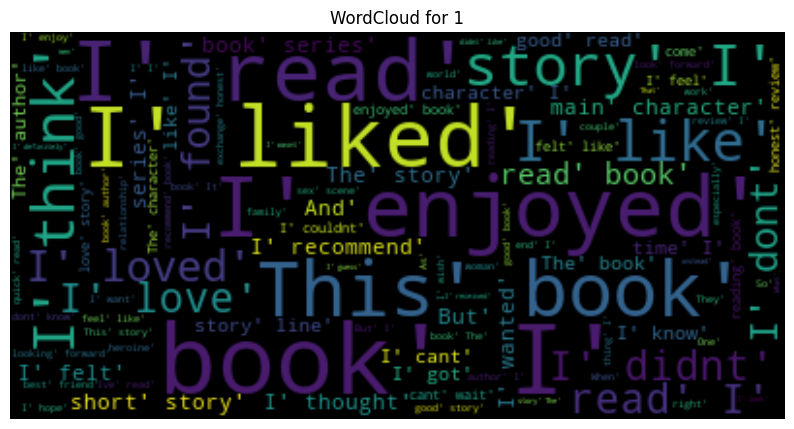

In [ ]:
word_cloud(list_tokenizer(rating_zero), 1)

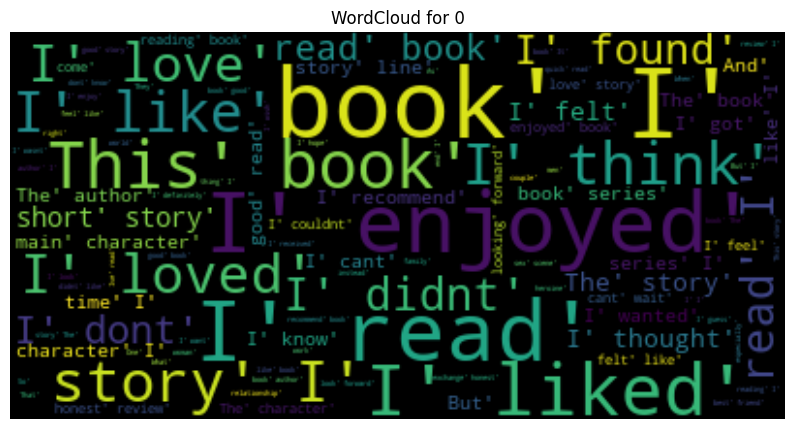

In [ ]:
word_cloud(list_tokenizer(rating_zero), 0)

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data["reviewText"] = data["reviewText"].apply(lambda text: lemmatize_words(text))
data.head()

,reviewText,overall
0,I enjoy vintage book movie I enjoyed reading b...,1
1,This book reissue old author born 1910 Its era...,0
2,This fairly interesting read It old- style ter...,0
3,Id read Amy Brewster mystery So I hooked,1
4,If like period piece - clothing lingo enjoy my...,0


In [ ]:
from collections import Counter
cnt = Counter()
for text in data["reviewText"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

In [ ]:
cn = cnt.most_common(10)
w = []
c = []

In [ ]:
for i in cn:
    w.append(i[0])
    c.append(i[1])

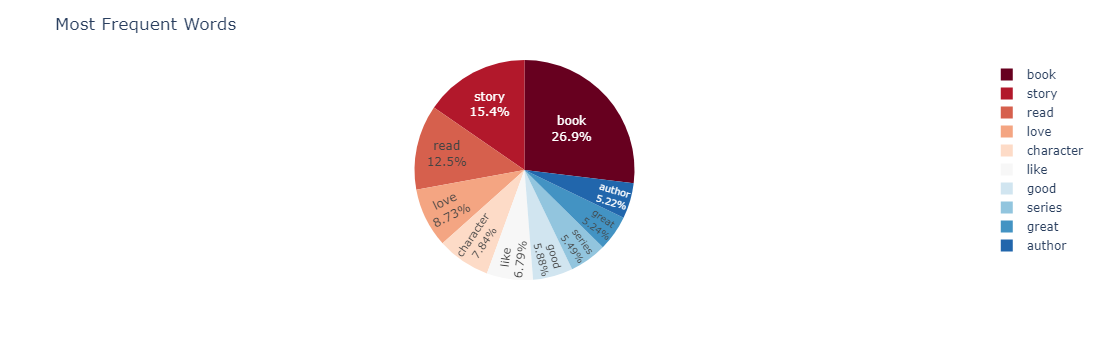

In [ ]:
fig = px.pie(data, values=c, names=w, color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title="Most Frequent Words")
fig.show()

In [ ]:
x=data['reviewText'].values
y=data['overall'].values

In [ ]:
x

array(['enjoy vintage book movie enjoyed reading book plot unusual dont think killing self-defense leaving scene body notifying police hitting jaw knock wash todaystill good read',
       'book reissue old author born 1910 era nero wolfe introduction interesting explaining author he forgotten id heard himthe language little dated time like calling gun 34heater34 good use fire dictionary look word like 34deshabille34 34canarsie34 worth look-see',
       'fairly interesting read old- style terminologyi glad read story doesnt coarse crasslanguage read fun relaxationi like free ebooksbecause check writer decide intriguinginnovative command englishthat convey story crude language',
       ...,
       'great book cherika fool let man away alexus blind way think man wont way woman cheating dre deserved feel way cherika hope dont wait long',
       'excellent book believe definitely page turner got caught character unbelievable thing woman went love cant wait 2',
       'book hope alexus wise 

In [ ]:
y

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(982619,) (786095,) (196524,) (786095,) (196524,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer=TfidfVectorizer()

x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [ ]:
print(x_train)

  (0, 239621)	0.030457689956226344
  (0, 532845)	0.04955052091939403
  (0, 629735)	0.037790587412709666
  (0, 144156)	0.018265258600976966
  (0, 198445)	0.05529208666426642
  (0, 307673)	0.020243872827705126
  (0, 80454)	0.020708264132924148
  (0, 656042)	0.053600120303851716
  (0, 182734)	0.07197727194950773
  (0, 181824)	0.043788574543588844
  (0, 404524)	0.041104690028181595
  (0, 111635)	0.011531490169902113
  (0, 560626)	0.0144693671636982
  (0, 482494)	0.03609926301370231
  (0, 610675)	0.05627201390828567
  (0, 650748)	0.05725440743538197
  (0, 494168)	0.05263134069160879
  (0, 485101)	0.08106808925083321
  (0, 705623)	0.06329027455586514
  (0, 354339)	0.03934504890666881
  (0, 65437)	0.04390658914612202
  (0, 753903)	0.04347671205713733
  (0, 204672)	0.04878090698616438
  (0, 709594)	0.040069037693260895
  (0, 625024)	0.05992101276184501
  :	:
  (786094, 167705)	0.1105854244904667
  (786094, 282517)	0.07442266875192782
  (786094, 490432)	0.11728891584261955
  (786094, 102184)	0.

In [ ]:
model=LogisticRegression(max_iter=1000)

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(y_train,x_train_prediction)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Training data accuracy:',training_data_accuracy)

Training data accuracy: 0.787262353786756


In [ ]:
x_test_prediction=model.predict(x_test)
testing_data_accuracy=accuracy_score(y_test,x_test_prediction)

In [ ]:
print('Testing data accuracy:',testing_data_accuracy)

Testing data accuracy: 0.7654383179662535
